In [1]:
import pandas as pd
import numpy as np 
import math

In [2]:
df  = pd.read_csv("Data set CSV.csv")

In [3]:
df

,City,x,y
0,1,5.500000e-08,9.860000e-09
1,2,-2.887330e+01,-7.980000e-08
2,3,-7.929160e+01,-2.140330e+01
3,4,-1.465770e+01,-4.338960e+01
4,5,-6.474730e+01,2.189820e+01
5,6,-2.905850e+01,-4.321670e+01
6,7,-7.207850e+01,1.815810e-01
7,8,-3.603660e+01,-2.161350e+01
8,9,-5.048080e+01,7.374470e+00
9,10,-5.058590e+01,-2.158820e+01


In [4]:
class City:
    def __init__(self, n ,long, lat):
        self.name = n
        self.long = long
        self.lat = lat

In [5]:
cities = np.array([])
for index, row in df.iterrows():
    cities = np.append( cities, City(row[0] , row[1] , row[2] ))

In [6]:
def init_city(cities):
    # start with certain city
    city = cities[14]
    return city
    

In [7]:
def calc_eculd(longCurr,latCurr,longRem,latRem):
    # calculate eculidean to remaining
    distance = math.sqrt((longCurr - longRem)**2 + (latCurr - latRem)**2)
    
    return distance


In [8]:
def greedy( curr,rems ):
    #least distance to current
    min1 = np.inf
    for rem in rems:
        dis = calc_eculd(curr.long,curr.lat,rem.long,rem.lat)
        if  dis <= min1:
            min1 = dis
            rem_min = rem
    return rem_min , min1
         
    

In [9]:
def termination(cities , visited):
    # if all visited terminate
    if len(visited)==len(cities):
        return 1
    else:
        return 0
    

In [10]:
# city 14
def TSP(cities):
    first_city = init_city(cities)
    visited = np.array([first_city])
    sequence = np.array([first_city.name])
    total_dis = 0
    curr1 = first_city
    while(True):
        ind = ~(np.isin(cities,visited))
        rems = cities[ind]
        rem_min , min1 = greedy( curr1,rems )
        visited = np.append(visited ,rem_min )
        sequence = np.append(sequence , rem_min.name)
        total_dis+=min1
        curr1 = rem_min
        if termination(cities ,visited ):
            sequence = np.append(sequence ,first_city.name)
            visited = np.append(visited ,first_city)
            total_dis+= calc_eculd(first_city.long,first_city.lat,rem_min.long,rem_min.lat)
            break    
    return  visited, sequence , total_dis 
    

In [11]:
sequence_objects, sequence , total_dis = TSP(cities)

In [12]:
sequence_objects

array([<__main__.City object at 0x000001CDF1785EB0>,
       <__main__.City object at 0x000001CDF1785EB0>], dtype=object)

In [13]:
sequence

array([15.,  9.,  5.,  7.,  3., 12., 14., 10.,  8.,  6.,  4., 11.,  1.,
       13.,  2., 15.])

In [14]:
total_dis

284.3810904080332

In [15]:
import matplotlib.pyplot as plt

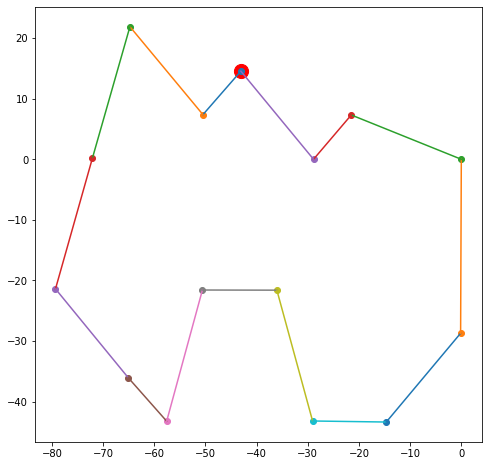

In [16]:
plt.figure(figsize=(8, 8))
plt.scatter(sequence_objects[0].long, sequence_objects[0].lat, label=sequence_objects[0].name, color='red', marker='o', s=200)
for i in range(len(sequence_objects)-1):
    plt.scatter(sequence_objects[i].long, sequence_objects[i].lat, label=sequence_objects[i].name)
    plt.plot([sequence_objects[i].long, sequence_objects[i + 1].long], [sequence_objects[i].lat, sequence_objects[i + 1].lat])